# Branchig ratios

## Width decay of $h \to \nu_i N_j$

$$
\Gamma\left(h \rightarrow v N \right) &=\frac{Y_N^2}{8 \pi m_h^3} (m_h^2 - m_N^2)^2
$$

In [1]:
from mpmath import *

In [2]:
mp.dps = 80; mp.pretty = True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Wh_nuN(mh,Mj,Cij):
    g = (2*80.379)/(246)
    mW = 80.379
    if Mj<mh:
        out = (Cij**2/(8*mp.pi*mh**3))*(mh**2 - Mj**2)**2
    else:
        out = 0.0
    return out

In [5]:
Wh_nuN(125.1,100,0.1)

0.0064876385268286252590368390446904518024266825914312391314374610041188993603118528

Loading data of LFVHD.txt

In [6]:
#LFVHD_data_degenerado = pd.read_csv('LFVHD-3-Degenerado.txt',sep='\t')
LFVHD_data = pd.read_csv('LFVHD-3_ISS.txt',sep='\t')
#LFVHD_data2 = pd.read_csv('LFVHD-3-1024.txt',sep='\t')



In [7]:
convert_to_array = lambda df,col:np.array(list(map(mpf,df[col])))

In [8]:
m6 = convert_to_array(LFVHD_data,'MR')
Whl1l2 = convert_to_array(LFVHD_data,'Whl1l2')
Whl1l3 = convert_to_array(LFVHD_data,'Whl1l3')
Whl2l3 = convert_to_array(LFVHD_data,'Whl2l3')

In [9]:
# m6 = convert_to_array(LFVHD_data,'MR')
# Whl1l2v2 = convert_to_array(LFVHD_data2,'Whl1l2')
# Whl1l3v2 = convert_to_array(LFVHD_data2,'Whl1l3')
# Whl2l3v2 = convert_to_array(LFVHD_data2,'Whl2l3')

In [10]:
# Whl1l2_degenerado = convert_to_array(LFVHD_data_degenerado,'Whl1l2')
# Whl1l3_degenerado = convert_to_array(LFVHD_data_degenerado,'Whl1l3')
# Whl2l3_degenerado = convert_to_array(LFVHD_data_degenerado,'Whl2l3')

In [11]:
from Unu_seesaw import YN, Osc_data, mheavy, mlight,mn1,mn6
from sympy import lambdify

In [12]:
Ynu = lambdify([mn1,mn6],YN.subs(Osc_data).subs(mheavy).subs(mlight),'mpmath')

In [13]:
Ynuij = lambda m6,i,j: Ynu(mpf(1e-12),m6)[i,j]

In [14]:
mn = lambda m6: (m6/3, m6/2, m6)
def WhnuN_sum(m6):
    out = 0
    for i in range(3):
        for j in range(3):
            out += Wh_nuN(125.1,mn(m6)[j],Ynuij(m6,i,j))
    return out

## Total width

In [15]:
WidthSM = 0.0032
Whlilj_tot = Whl1l2  + Whl1l3  + Whl2l3  #+ Whl2l1 + Whl3l1 + Whl3l2
# Whlilj_totv2 = Whl1l2v2  + Whl1l3v2  + Whl2l3v2 
# Whlilj_tot_degenerado = Whl1l2_degenerado  + Whl1l3_degenerado  + Whl2l3_degenerado


In [16]:
WHnuN_tot = np.array([WhnuN_sum(m) for m in m6])

In [17]:
Wtot = (
    Whlilj_tot + 
    #abs(WHnuN_tot) + 
    WidthSM
)

# Wtotv2 = (
#     Whlilj_totv2 + 
#     abs(WHnuN_tot) + 
#     WidthSM
# )

# Wtot_degenerado = (
#     Whlilj_tot_degenerado + 
#     abs(WHnuN_tot) + 
#     WidthSM
# )
#Wtot

## Branching ratios

In [18]:
from OneLoopLFVHD.data import ml

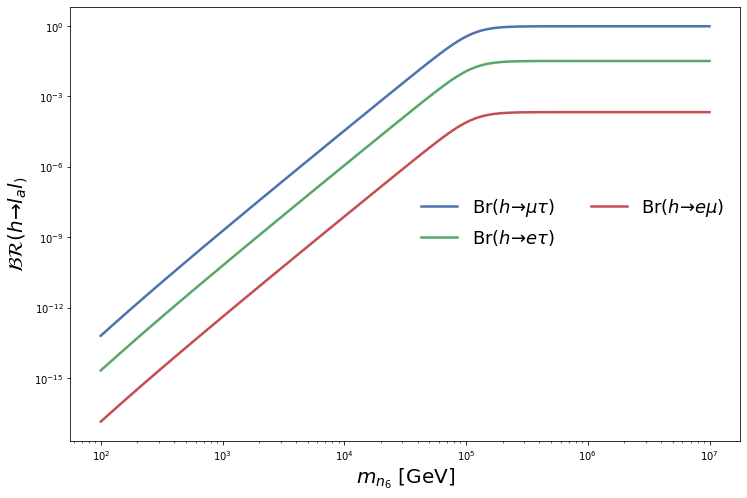

In [19]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12,8))
    plt.loglog(m6,(
        Whl2l3 #+ Whl3l2
    )/Wtot,label=r'Br$(h \to \mu \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l3 #+ Whl3l1
    )/Wtot,label=r'Br$(h \to e \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l2 #+ Whl2l1
    )/Wtot,label=r'Br$(h \to e \mu)$',linewidth=2.5)

    
    # plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
    #            ['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
    # plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)
    # plt.xlim(1e-1,1e15)

    plt.legend(fontsize=18,ncol=2,frameon=False,bbox_to_anchor=(0.5,0.6))
    #plt.ylabel(r'BR($h \to e_a e_b$)',fontsize=18)
    plt.xlabel('$m_{n_6}$ [GeV]',fontsize=20)
    plt.ylabel(r'$\mathcal{BR}(h \to l_a l_)$',fontsize=20)   
    plt.savefig('BR_LFVHD-3.png',dpi=200)

In [38]:
from Unu_seesaw import Ynu as Ynu_SS
from Unu_seesaw_ISS import Ynu as Ynu_ISS

from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = Nudata.squareDm21.central*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import B1_0, B12_0, C0, C1


def BRhlklm_SS(k,m,MR):
    v = mpf('246')
    mW = mpf('80.379')
    mh = mpf('125.1')
    Y =  Ynu_SS(m1,m2,m3,MR,MR,MR)
    YTc = matrix([[conj(Y[i,j]) for i in range(3)] for j in range(3)])
    #nprint(chop(Y.T-YTc))
    YY = Y*YTc
    #print(YY)
    YYYY = YY*YY
    #F = abs(YY[k-1,m-1] - YYYY[k-1,m-1])**2
    
    #return  ((v**4)/(MR**2))*(abs(log(MR**2)*YY[k-1,m-1]/5e6- log(MR**2)*YYYY[k-1,m-1])**2 )


    # C01 = (-C0(mh,mW,MR,MR) + C1(mh,ml[k],mW,MR,MR))
    # C01 = (1/mh**2)*(B1_0(ml[k],mW,MR) - B12_0(mh,MR,MR) +(MR**2 - mW**2 - mh**2)*C0(mh,mW,MR,MR))
    # return ((v**4)/(MR**2))*(abs(YY[k-1,m-1]*C01 - (mW**2)*YYYY[k-1,m-1])**2 )
    return ((v**2)/1e18)*(abs(2*YY[k-1,m-1] - YYYY[k-1,m-1]*log(MR/mW) )**2 )#

def r(x):
    p = 1 - 2*x + 8*x**2
    return (
        -mpf('0.5') - x - 8*x**2 +2*p*sqrt(4*x - 1)*atan(1.0/sqrt(4*x - 1)) 
        + 16*x**2*(1 - 2*x)*atan(1.0/sqrt(4*x - 1))**2
        )

rx = r(mpf('80.379')**2/mpf('125.1')**2)

def Whlalb_SS_MIA(m,k,m6):
    v = mpf('246')
    mW = mpf('80.379')
    mh = mpf('125.1')
    g = 2*mW/v
    Y =  Ynu_SS(m1,m2,m3,m6,m6,m6)
    YTc = matrix([[conj(Y[i,j]) for i in range(3)] for j in range(3)])
    #nprint(chop(Y.T-YTc))
    YY = Y*YTc
    YYYY = YY*YY


    F = ((g**2*ml[k]**2*mh)/(2**16*pi**5*mW**2))
    return F*abs(
        (mh**2/m6**2)*(rx + log(mW**2/m6**2))*YY[k-1,m-1] 
        - (3*v**2/m6**2)*YYYY[k-1,m-1]
        )



# from Unu_seesaw import diagonalizationMnu_svd as diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)
# def Whlalb_SS_EFT(a,b,m6):
#     v = mpf('246')
#     mW = mpf('80.379')
#     mh = mpf('125.1')
#     Y =  Ynu_SS(m1,m2,m3,m6,m6,m6)
#     mn, UL,UR = diagonalizationMnu1(m1,m6)
#     Rab = fsum([Y[i,b-1]*conj(Y[i,a-1])*log(mn[i]/mW)/mn[i]**2 for i in range(3)])
#     return ((mh**5*ml[b]**2)/(8*pi*(16*pi)**2*v**2))*abs(Rab)**2

#nprint(chop(BRhlklm_SS(2,3,2)))

In [39]:
BRhmutau_1_approx_SS = np.array(
    [BRhlklm_SS(2,3,m) for m in m6]);

In [40]:

# Whmutau_1_approx_SS_EFT = np.array(
#     [Whlalb_SS_EFT(2,3,m) for m in m6]);

# Whetau_1_approx_SS_EFT = np.array(
#     [Whlalb_SS_EFT(1,3,m) for m in m6]);

# Whemu_1_approx_SS_EFT = np.array(
#     [Whlalb_SS_EFT(1,2,m) for m in m6]);

# TotalW_EFT = 0.0032 + Whmutau_1_approx_SS_EFT + Whetau_1_approx_SS_EFT + Whemu_1_approx_SS_EFT;
# BRhmutau_1_approx_SS_EFT = Whmutau_1_approx_SS_EFT/TotalW_EFT

Whmutau_1_approx_SS_MIA = np.array(
    [Whlalb_SS_MIA(2,3,m) for m in m6]);

Whetau_1_approx_SS_MIA = np.array(
    [Whlalb_SS_MIA(1,3,m) for m in m6]);

Whemu_1_approx_SS_MIA= np.array(
    [Whlalb_SS_MIA(1,2,m) for m in m6]);

TotalW_MIA = 0.0032 + Whmutau_1_approx_SS_MIA + Whetau_1_approx_SS_MIA + Whemu_1_approx_SS_MIA;
BRhmutau_1_approx_SS_MIA = Whmutau_1_approx_SS_MIA/TotalW_MIA

In [42]:
from Unu_seesaw_ISS import diagonalizationMnu_ISS
def Acoy(a,b,m6,mux=mpf('1e-7')):
    Y =  Ynu_ISS(m1,m2,m3,m6,m6,m6,mux,mux,mux)
    M,UL,UR = diagonalizationMnu_ISS(m1,m2,m3,m6,m6,m6,mux,mux,mux)
    F = mp.fsum(
        [
            mp.conj(Y[i,a-1])*Y[i,b-1]/M[i]**2*mp.log(M[i]/mpf('80.379')) for i in range(3)
        ]
        )
    return F

Acoy = np.array([abs(Acoy(2,3,m))**2 for m in m6])

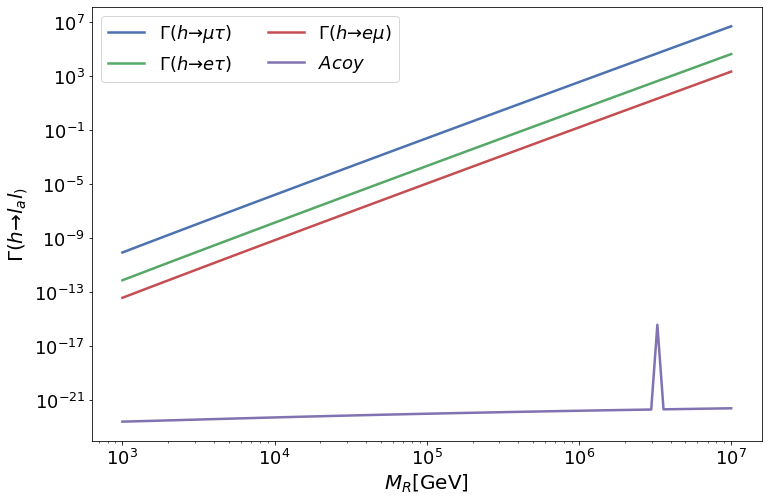

In [44]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12,8))
    plt.loglog(m6,Whl2l3,label=r'$\Gamma(h \to \mu \tau)$',linewidth=2.5)
    plt.loglog(m6,Whl1l3,label=r'$\Gamma(h \to e \tau)$',linewidth=2.5)
    plt.loglog(m6,Whl1l2,label=r'$\Gamma(h \to e \mu)$',linewidth=2.5)
    
    plt.loglog(m6,Acoy,label=r'$Acoy$',linewidth=2.5)

    #plt.loglog(m6,BRhmutau_1_approx_SS,label=r'Br$(h \to \mu \tau)_{aprox}$')
    # plt.loglog(m6,Whmutau_1_approx_SS_EFT,label=r'Br$(h \to \mu \tau)_{EFT}$')
    #plt.loglog(m6,Whmutau_1_approx_SS_MIA,label=r'Br$(h \to \mu \tau)_{MIA}$')

    plt.legend(fontsize=18,ncol=2,frameon=False,bbox_to_anchor=(0.5,0.6))
    #plt.ylabel(r'BR($h \to e_a e_b$)',fontsize=18)
    plt.xlabel('$m_{n_6}$ [GeV]',fontsize=20)
    plt.ylabel(r'$\Gamma(h \to l_a l_)$',fontsize=20)   
    plt.savefig('BR_LFVHD-3.png',dpi=200)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('$M_R$[GeV]',fontsize=20)
plt.legend(ncol=2,fontsize=18)

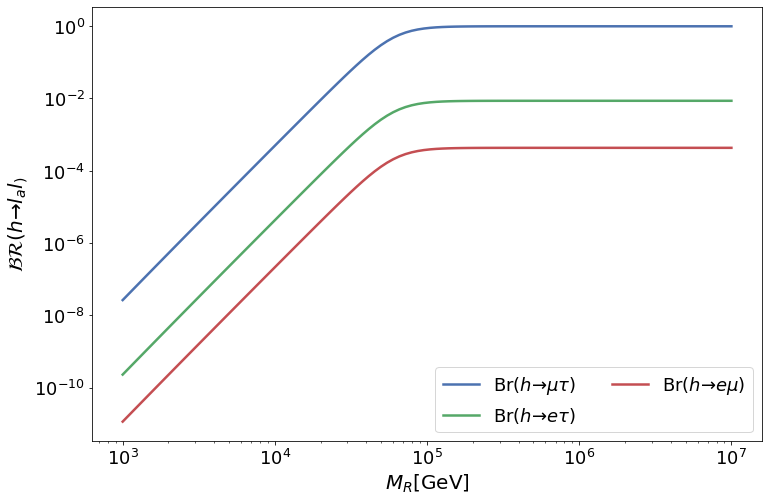

In [25]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12,8))
    plt.loglog(m6,(
        Whl2l3 #+ Whl3l2
    )/Wtot,label=r'Br$(h \to \mu \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l3 #+ Whl3l1
    )/Wtot,label=r'Br$(h \to e \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l2 #+ Whl2l1
    )/Wtot,label=r'Br$(h \to e \mu)$',linewidth=2.5)

    #plt.loglog(m6,BRhmutau_1_approx_SS,label=r'Br$(h \to \mu \tau)_{aprox}$')
    # plt.loglog(m6,Whmutau_1_approx_SS_EFT,label=r'Br$(h \to \mu \tau)_{EFT}$')
    #plt.loglog(m6,Whmutau_1_approx_SS_MIA,label=r'Br$(h \to \mu \tau)_{MIA}$')

    plt.legend(fontsize=18,ncol=2,frameon=False,bbox_to_anchor=(0.5,0.6))
    #plt.ylabel(r'BR($h \to e_a e_b$)',fontsize=18)
    plt.xlabel('$m_{n_6}$ [GeV]',fontsize=20)
    plt.ylabel(r'$\mathcal{BR}(h \to l_a l_)$',fontsize=20)   
    plt.savefig('BR_LFVHD-3.png',dpi=200)


#plt.ylim(1e-11,1e-5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('$M_R$[GeV]',fontsize=20)
plt.legend(ncol=2,fontsize=18)
#plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=16);
#plt.savefig('BRcLFV_ISS.png')

In [ ]:
ma = 1.7 #GeV
mw= 80 #GeV
mn = 10**5 # GeV
#B0() -> - 22.0259

In [ ]:
ma = 1.7 #GeV
mw= 80 #GeV
mn = 10**-18 # GeV
#B0() -> - 7.76381

In [ ]:
mh = 125 # GeV
mw= 80 #GeV
mn = 10**-18 # GeV
mn = 10**5 # GeV
#C0() -> -1.42618e-9

In [ ]:
mh = 125 # GeV
mw= 80 #GeV
mn = 10**-18 # GeV
mn = 10**15 # GeV
#C0() -> -6.03135e-29